## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [2]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')

root_path = 'fmnist'
mkdir(root_path)

Directory fmnist is created!


In [3]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path,
                                                        train=True,
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path,
                                                       train=False,
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.7MB/s]


Extracting fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 198kB/s]


Extracting fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.97MB/s]


Extracting fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 3.77MB/s]

Extracting fmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



In [4]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train,
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

In [5]:
len(fmnist_dataset_test)

10000

In [6]:
for img, label in train_loader:
    print(img.shape)
#     print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])
128


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [7]:
class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
          nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
          nn.Linear(input_shape, 512),
          nn.LeakyReLU(),
          nn.Linear(512, 256),
          nn.LeakyReLU(),
          nn.Linear(256, 64),
          nn.LeakyReLU(),
          nn.Linear(64, 32),
          nn.LeakyReLU(),
          nn.Linear(32, num_classes),
          nn.LogSoftmax(dim=1)
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [8]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
         LeakyReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 256]         131,328
         LeakyReLU-5                  [-1, 256]               0
            Linear-6                   [-1, 64]          16,448
         LeakyReLU-7                   [-1, 64]               0
            Linear-8                   [-1, 32]           2,080
         LeakyReLU-9                   [-1, 32]               0
           Linear-10                   [-1, 10]             330
       LogSoftmax-11                   [-1, 10]               0
Total params: 552,106
Trainable params: 552,106
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

Your experiments come here:

Epoch 1/20, Loss: 0.6425, Accuracy: 77.13%
Epoch 2/20, Loss: 0.3958, Accuracy: 85.55%
Epoch 3/20, Loss: 0.3464, Accuracy: 87.35%
Epoch 4/20, Loss: 0.3189, Accuracy: 88.26%
Epoch 5/20, Loss: 0.2974, Accuracy: 89.03%
Epoch 6/20, Loss: 0.2830, Accuracy: 89.49%
Epoch 7/20, Loss: 0.2698, Accuracy: 89.92%
Epoch 8/20, Loss: 0.2557, Accuracy: 90.45%
Epoch 9/20, Loss: 0.2459, Accuracy: 90.74%
Epoch 10/20, Loss: 0.2378, Accuracy: 91.06%
Epoch 11/20, Loss: 0.2256, Accuracy: 91.50%
Epoch 12/20, Loss: 0.2195, Accuracy: 91.75%
Epoch 13/20, Loss: 0.2115, Accuracy: 92.03%
Epoch 14/20, Loss: 0.2045, Accuracy: 92.19%
Epoch 15/20, Loss: 0.1968, Accuracy: 92.55%
Epoch 16/20, Loss: 0.1900, Accuracy: 92.70%
Epoch 17/20, Loss: 0.1820, Accuracy: 93.02%
Epoch 18/20, Loss: 0.1779, Accuracy: 93.17%
Epoch 19/20, Loss: 0.1676, Accuracy: 93.61%
Epoch 20/20, Loss: 0.1640, Accuracy: 93.69%
Test Accuracy: 89.40%


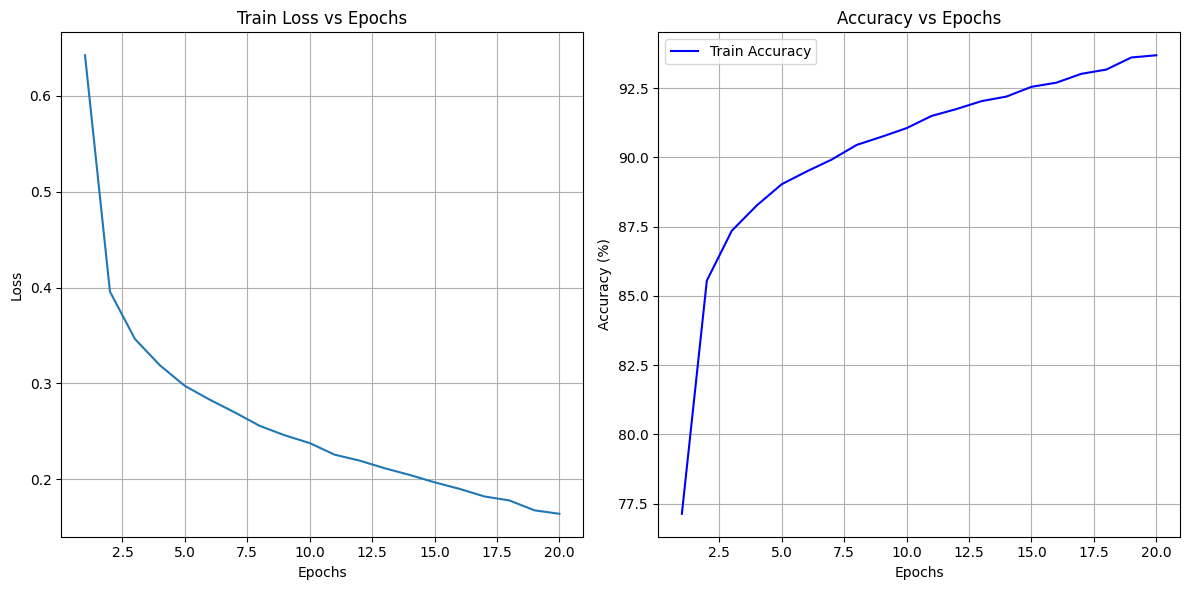

In [9]:
import torch.optim as optim

model = TinyNeuralNetwork().to(device)
opt = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

train_losses = []
train_accuracies = []
test_accuracies = []

# Обучение модели
def train(model, train_loader, optimizer, loss_func, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Обнуление градиентов
            optimizer.zero_grad()

            # Прямой проход
            outputs = model(images)

            # Вычисление потерь
            loss = loss_func(outputs, labels)

            # Обратный проход и оптимизация
            loss.backward()
            optimizer.step()

            # Подсчет статистик
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Подсчитываем точность на обучающих данных
        train_accuracy = 100 * correct / total
        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(train_accuracy)

        # Печать статистики за эпоху
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%')

# Оценка модели
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)
    print(f'Test Accuracy: {test_accuracy:.2f}%')

# Обучение и оценка модели
epochs = 20
train(model, train_loader, opt, loss_func, epochs=epochs)
test(model, test_loader)

plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.title('Train Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy', color='b')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()

### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [37]:
# Для демонстрации переобучения, уменьшаем размер тренировочного набора данных
from torch.utils.data import DataLoader, Subset

train_subset = Subset(fmnist_dataset_train, np.random.choice(len(fmnist_dataset_train), 1000, replace=False))  # 1000 примеров
train_loader_over = DataLoader(train_subset, batch_size=64, shuffle=True)
test_loader_over = DataLoader(fmnist_dataset_test, batch_size=64, shuffle=False)


class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),  # Преобразование изображения в вектор
            nn.Linear(input_shape, 2048),  # Сложный слой
            nn.ReLU(),  # Активация ReLU
            nn.BatchNorm1d(2048),  # Batch Normalization
            nn.Dropout(0.5),  # Dropout
            nn.Linear(2048, 1024),  # Еще более сложный слой
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)  # Финальный слой
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [36]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 2048]       1,607,680
              ReLU-3                 [-1, 2048]               0
       BatchNorm1d-4                 [-1, 2048]           4,096
           Dropout-5                 [-1, 2048]               0
            Linear-6                 [-1, 1024]       2,098,176
              ReLU-7                 [-1, 1024]               0
       BatchNorm1d-8                 [-1, 1024]           2,048
           Dropout-9                 [-1, 1024]               0
           Linear-10                  [-1, 512]         524,800
             ReLU-11                  [-1, 512]               0
      BatchNorm1d-12                  [-1, 512]           1,024
          Dropout-13                  [-1, 512]               0
           Linear-14                   

Epoch 1/20, Loss: 1.1116, Accuracy: 61.40%
Test Loss: 1.1129, Test Accuracy: 65.03%
Epoch 2/20, Loss: 0.8076, Accuracy: 73.40%
Test Loss: 0.8521, Test Accuracy: 70.37%
Epoch 3/20, Loss: 0.5921, Accuracy: 77.20%
Test Loss: 0.6525, Test Accuracy: 75.57%
Epoch 4/20, Loss: 0.4454, Accuracy: 83.90%
Test Loss: 0.6922, Test Accuracy: 76.69%
Epoch 5/20, Loss: 0.4330, Accuracy: 83.40%
Test Loss: 0.7058, Test Accuracy: 76.34%
Epoch 6/20, Loss: 0.3884, Accuracy: 85.30%
Test Loss: 0.6250, Test Accuracy: 78.60%
Epoch 7/20, Loss: 0.3501, Accuracy: 87.10%
Test Loss: 0.6921, Test Accuracy: 78.24%
Epoch 8/20, Loss: 0.3019, Accuracy: 87.80%
Test Loss: 0.7183, Test Accuracy: 77.42%
Epoch 9/20, Loss: 0.2808, Accuracy: 90.50%
Test Loss: 0.7586, Test Accuracy: 77.96%
Epoch 10/20, Loss: 0.2506, Accuracy: 90.80%
Test Loss: 0.8216, Test Accuracy: 75.95%
Epoch 11/20, Loss: 0.2901, Accuracy: 88.20%
Test Loss: 0.8956, Test Accuracy: 75.51%
Epoch 12/20, Loss: 0.2342, Accuracy: 90.20%
Test Loss: 0.7372, Test Accura

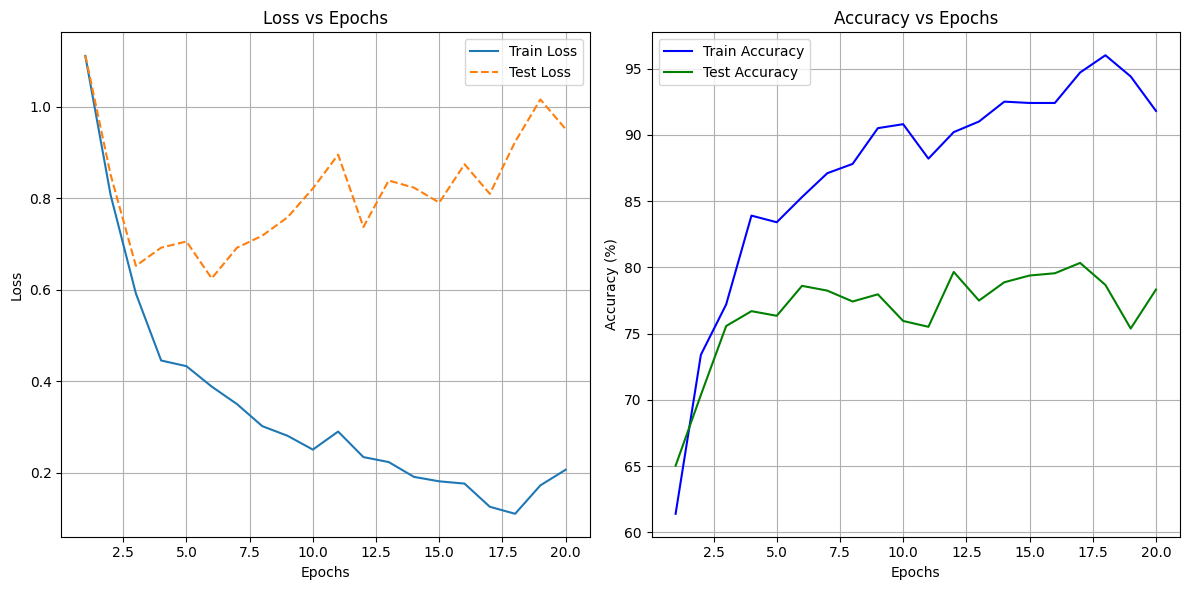

In [50]:
model = OverfittingNeuralNetwork().to(device)

# Your experiments, come here
opt = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

# Массивы для хранения значений потерь и точности
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Функция для подсчета точности
def accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    return (predicted == labels).sum().item() / labels.size(0)

# Обучение модели
def train(model, train_loader, optimizer, loss_func, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Обнуление градиентов
            optimizer.zero_grad()

            # Прямой проход
            outputs = model(images)

            # Вычисление потерь
            loss = loss_func(outputs, labels)

            # Обратный проход и оптимизация
            loss.backward()
            optimizer.step()

            # Подсчет статистик
            running_loss += loss.item()
            correct += accuracy(outputs, labels) * labels.size(0)
            total += labels.size(0)

        # Сохраняем потери и точность для графиков
        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

        # Печать статистики за эпоху
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%')

        test(model, test_loader_over)



# Оценка модели
def test(model, test_loader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_func(outputs, labels)
            running_loss += loss.item()
            correct += accuracy(outputs, labels) * labels.size(0)
            total += labels.size(0)

    test_losses.append(running_loss / len(test_loader))
    test_accuracies.append(100 * correct / total)
    print(f'Test Loss: {running_loss/len(test_loader):.4f}, Test Accuracy: {100 * correct / total:.2f}%')

# Обучение и тестирование модели
epochs = 20
train(model, train_loader_over, opt, loss_func, epochs=epochs)


# Графики
# Plot loss and accuracy
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss', linestyle='--')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy', color='b')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy', color='g')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()

Потери на тестовом наборе увеличиваются по мере увеличения сложности модели, это говорит о переобучении модели.

### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

In [26]:
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),  # Преобразование изображения в вектор
            nn.Linear(input_shape, 512),  # Линейный слой
            nn.ReLU(),  # Активация ReLU
            nn.BatchNorm1d(512),  # Batch Normalization
            nn.Dropout(0.5),  # Dropout для регуляризации
            nn.Linear(512, 256),  # Линейный слой
            nn.ReLU(),
            nn.BatchNorm1d(256),  # Batch Normalization
            nn.Dropout(0.5),  # Dropout
            nn.Linear(256, num_classes)  # Финальный слой
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [19]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
       BatchNorm1d-4                  [-1, 512]           1,024
           Dropout-5                  [-1, 512]               0
            Linear-6                  [-1, 256]         131,328
              ReLU-7                  [-1, 256]               0
       BatchNorm1d-8                  [-1, 256]             512
           Dropout-9                  [-1, 256]               0
           Linear-10                   [-1, 64]          16,448
             ReLU-11                   [-1, 64]               0
      BatchNorm1d-12                   [-1, 64]             128
           Linear-13                   [-1, 10]             650
Total params: 552,010
Trainable params:

Epoch 1/20, Loss: 0.5762, Accuracy: 79.54%
Test Loss: 0.4332, Test Accuracy: 84.25%
Epoch 2/20, Loss: 0.3857, Accuracy: 85.94%
Test Loss: 0.4064, Test Accuracy: 85.17%
Epoch 3/20, Loss: 0.3380, Accuracy: 87.54%
Test Loss: 0.3580, Test Accuracy: 86.63%
Epoch 4/20, Loss: 0.3111, Accuracy: 88.57%
Test Loss: 0.3586, Test Accuracy: 86.66%
Epoch 5/20, Loss: 0.2916, Accuracy: 89.14%
Test Loss: 0.3356, Test Accuracy: 87.48%
Epoch 6/20, Loss: 0.2478, Accuracy: 90.68%
Test Loss: 0.3226, Test Accuracy: 87.67%
Epoch 7/20, Loss: 0.2348, Accuracy: 91.12%
Test Loss: 0.3256, Test Accuracy: 87.97%
Epoch 8/20, Loss: 0.2243, Accuracy: 91.46%
Test Loss: 0.3133, Test Accuracy: 88.62%
Epoch 9/20, Loss: 0.2157, Accuracy: 91.70%
Test Loss: 0.3299, Test Accuracy: 88.05%
Epoch 10/20, Loss: 0.2062, Accuracy: 92.09%
Test Loss: 0.3045, Test Accuracy: 89.12%
Epoch 11/20, Loss: 0.1723, Accuracy: 93.31%
Test Loss: 0.2981, Test Accuracy: 89.85%
Epoch 12/20, Loss: 0.1627, Accuracy: 93.72%
Test Loss: 0.3100, Test Accura

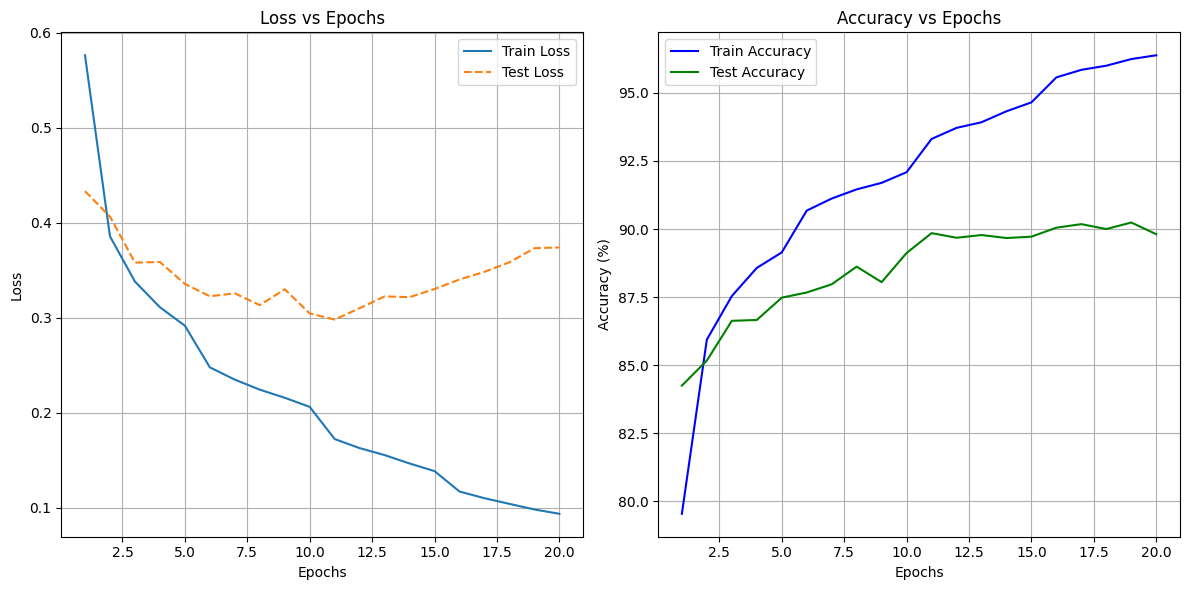

In [49]:
from torch.optim.lr_scheduler import StepLR

model = FixedNeuralNetwork().to(device)
opt = optim.AdamW(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()
scheduler = StepLR(opt, step_size=5, gamma=0.5)

# Your experiments, come here
# Массивы для хранения значений потерь и точности
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Функция для подсчета точности
def accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    return (predicted == labels).sum().item() / labels.size(0)

# Обучение модели
def train(model, train_loader, optimizer, loss_func, epochs=20):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Обнуление градиентов
            optimizer.zero_grad()

            # Прямой проход
            outputs = model(images)

            # Вычисление потерь
            loss = loss_func(outputs, labels)

            # Обратный проход и оптимизация
            loss.backward()
            optimizer.step()

            # Подсчет статистик
            running_loss += loss.item()
            correct += accuracy(outputs, labels) * labels.size(0)
            total += labels.size(0)

        # Сохраняем потери и точность для графиков
        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

        # Печать статистики за эпоху
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%')

        test(model, test_loader)

        # Обновление learning rate
        scheduler.step()

# Оценка модели
def test(model, test_loader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_func(outputs, labels)
            running_loss += loss.item()
            correct += accuracy(outputs, labels) * labels.size(0)
            total += labels.size(0)

    test_losses.append(running_loss / len(test_loader))
    test_accuracies.append(100 * correct / total)
    print(f'Test Loss: {running_loss/len(test_loader):.4f}, Test Accuracy: {100 * correct / total:.2f}%')

# Обучение и тестирование модели
epochs = 20
train(model, train_loader, opt, loss_func, epochs=epochs)

# Графики
# Plot loss and accuracy
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss', linestyle='--')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy', color='b')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy', color='g')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()

График точности (Accuracy vs Epochs):Из графика видно, что с регуляризацией точность на тестовых данных стабилизировалась, а на обучающих данных будет продолжает расти. Аналогично с График потерь (Loss vs Epochs)

### Conclusions:
_Write down small report with your conclusions and your ideas._

Чтобы уменьшить переобучение и улучшить производительность модели, можно использовать регуляризационные техники, такие как Dropout и Batch Normalization, а также уменьшить размер модели. Также можно добавить больше слоев с меньшим количеством нейронов и использовать раннюю остановку для предотвращения слишком долгого обучения.

1) Уменьшение сложности модели: В этой модели уменьшается количество нейронов в слоях по сравнению с предыдущим вариантом. Это помогает предотвратить переобучение на небольшом датасете.

3) Добавление Batch Normalization: BatchNorm1d используется после каждого линейного слоя. Это помогает стабилизировать обучение, ускорить сходимость и предотвратить переобучение.

3) Использование Dropout: Добавление Dropout(0.5) между слоями. Этот метод помогает модели не слишком полагаться на определенные нейроны, что способствует регуляризации.

4) Использование AdamW: Для улучшения стабильности обучения используется оптимизатор AdamW.

5) LR Scheduler: Добавлен StepLR, который уменьшает learning rate на определённом шаге (каждые 5 эпох), что помогает предотвратить переобучение и ускоряет сходимость модели.